# Bandits
 In the aim of this notebook is to explain the efficacy of Thompsons sampling in Bandit Problems and compare its performance to other methods. In order to do so, first, we briefly explain the solution concepts for Bandit Problems followed by a brief introduction of existing algorithms with their shortcomings to accentuate the need for Thompson Sampling. We then enunciate on the key concepts of Thompson Sampling and present simulations comparing Thompsons sampling with other algorithms in different scenarios. Finally, we conclude by explaining some limitations of Thompsons sampling technique.
## Solution concepts of Bandit Problems:
   The solution concepts for Bandit problems can be broadly broken down into three categories:
   <ol>
  <p> <li><I>Asymptotic Correctness:</I></li>
       Asymtotic Correctness is the simplest solution concept as it gaurantees converging to a true expected payoff/reward $q_*(a^*)$ with time($t\rightarrow\infty$) without any bounds.</p>
   <p><li><I>Regret Optimality:</I></li>
       Regret Optimality in some sense deals with the rate of convergence of a Bandit Algorithm. Regret can be defined as the loss incurred in converging to the true expected payoff/reward $q_*(a^*)$ due to the learning process. Any Bandit learning algorithm is ideally expected to converge to the true payoff $q_*(a^*)$ as quickly as possible, however, in doing so it must give away exploration and commit to exploiting with whatever estimates it has. This can sometimes lead to suboptimal outcomes as the algorithm can commit to pulling a suboptimal arm thus resulting in a constant regret. Algorithms aiming at regret optimality seek to strike a balance between this situation along with reducing the overall regret.</p>
   <p><li><I>Probably Approximately Correct (PAC) complexity / optimality:</I></li>
       PAC optimal algorithms provide guarantees of finding an arm $a$ whose payoff/expected reward $q_*(a)$ is close to the expected payoff of the best arm $a^*$ i.e. $q_*(a^*) $ by a some factor($\epsilon$) i.e. $q_*(a) \geqslant  q_*(a^*) - \epsilon$ with a probability of at least $(1- \delta)$. If one thinks about it this condition is very easy to satisfy if there is no limit on exploration as one can ultimately converge to the given $\epsilon$ and $\delta$ but the optimality part comes into picture when convergence has to be reached in minimum number of steps to satisfy the $(\epsilon,\delta)$ PAC guarantee. In other words, PAC optimal algorithms aim at reducing the sampling complexity learning problem as opposed to maximizing the expected reward during both exploration and exploitation.</p>
    </ol>


 
## Bandit Algorithms
<ol>
 <p><li><b>Epsilon $(\epsilon)$ Greedy selection:</b> </li>
         The $(\epsilon)$-Greedy or $(\epsilon)$-First algorithm operates by initially pulling all the $K$ arms where $K \in \mathbb{N}$ for $\epsilon N$ trials, $N \in \mathbb{N}$  and then for $(1- \epsilon)N$ trials pulling the arm that gives the highest expected payoff. Note that here $0< \epsilon < 1 $ and is decided by the user. The $\epsilon$-Greedy algorithm can lead to a suboptimal outcome as it can asymptotically prevent the algorithm to choose the optimal arm. One solution for this is decreasing the $\epsilon$ over time to facilitate asymptotic convergence to the optimal arm. This results in the optimal arm being chosen $\epsilon_N$ times. However, this algorithm can still lead to inefficient exploration as it might too quickly commit to choosing the better performing arm earlier in the trials while assigning equal weight to another arm which might lead to better performance. Another disadvantage of this algorithm is that it keeps pulling the suboptimal arms by a probability of $\epsilon /N$ which negatively affects the regret optimalilty.
 </p>
</ol>

## $(\epsilon)$-Greedy and UCB

In class, we studied $(\epsilon)$-Greedy and upper confidence bound (UCB), both of these algorithms handle exploration vs exploitation in different ways. Epsilon-greedy method explores with a small probability and explores otherwise. The probability remains constant through the lifetime of the agent. UCB takes inspiration from optimistic initial values and instead of setting high reward value once and for all the actions. UCB increases the reward value by a factor that both reduces by time and is different for each action. This allows the algorithm to explore all actions weighted by how often they were explored in the past.

   
## Thompson Sampling 
One major problem in UCB is that it will tend to explore all the actions regardless of how low or variable the reward values are. This leads to bad decisions by the agent, because if a particular action has a reward whose upper bound is worse than another action's reward, then we don't need to explore it. Hence, we need an algorithm which can account for both reward and its variability. Thompson sampling works by sampling rewards for each action at each time step from a distribution. This distribution reflects the agents belief on the expected rewards at any given time. As the time increases the agent becomes more confident about its belief and the variance in the sampled reward decreases. The agent chooses the action based upon the sampled mean reward and not the expected mean reward. This allows the agent to explore actions which are worth exploring based upon the expected mean and confidence in value. The choice of distribution depends upon how we sample our rewards. 
### Bernoulli I.I.D. Rewards
For the case when rewards are sampled from bernoulli distribution, the prior and hence the posterior is given by beta distribution which is the conjugate distribution.  

\begin{align}
p(\theta_k) = \frac{\Gamma (\alpha_k + \beta_k)}{\Gamma (\alpha_k) \Gamma (\beta_k)} \theta_k^{\alpha_k-1} (1 - \theta_k)^{\beta_k-1}
\end{align}

The rewards are sampled from the above equation. Here $\alpha_k$ and $\beta_k$ success ($r_t$) and failure ($1-r_t$) rewards till current time step. We can represent mean and variance in terms of $\alpha$ and $\beta$ for beta distribution in the following manner.

\begin{align}
Mean = \frac{\alpha}{\alpha + \beta} \\
Variance = \frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}\\
\end{align}

As we can see from the above equation as the number of times a particular action is chosen increases ($\alpha + \beta$), the variance reduces. Thus as we get more rewards the confidence increases.

### Gaussian I.I.D. Rewards
We will be using Gaussian sampling for our experiments, in particular we will assume that are rewards are sampled from $N(\mu, 1)$. Thus we know variance and $\mu$ is the only unknown parameter for the distribution. Initially we start with prior $N(0, 1)$ and the posterior is given by $N(\mu_n, \frac{1}{n+1})$. Below is the proof for posterior distribution 

\begin{align}
    Pr(\theta|r) &\propto Pr(r|\theta) Pr(\theta) \\
                 &\propto e^{-\frac{1}{2}(r-\theta)^2} e^{-\frac{n+1}{2}(\theta-\mu_n)^2} \\
                 &\propto e^{-\frac{1}{2} ((n+2)\theta^2 - 2\theta(r + (n+1)\mu_n))} \\
                 &= e^{-\frac{1}{2} ((n+2)\theta^2 - 2\theta(n+2)\mu_{n+1})} \\
                 &\propto e^{-\frac{(n+2)}{2} (\theta^2 - 2\theta\mu_{n+1} + \mu_{n+1}^2)} \\
                 &\propto e^{-\frac{(n+2)}{2} (\theta - \mu_{n+1})^2} \\
                 &\propto N(\mu_{n+1}, \frac{1}{n+2})
\end{align}

## 10 Arm Bandit and Variance in Rewards 1

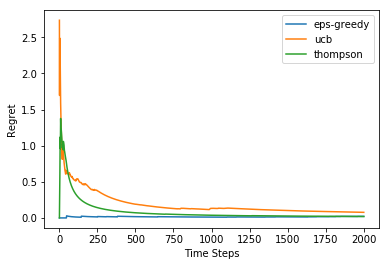

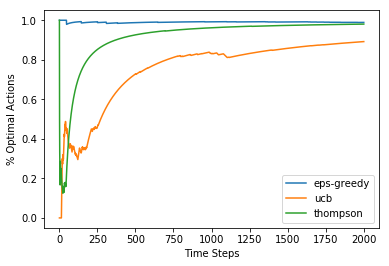

Choosen Rewards per Action
[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


In [4]:
from bandit import bandit
import matplotlib.pyplot as plt

k = 10
timesteps = 2000
trybandit = bandit(k=k, seed=123)
optimal_reward_eps = trybandit.start(timesteps, name="eps-greedy", eps=0.01)
trybandit.plot("plots", noshow=True)
optimal_reward_ucb = trybandit.start(timesteps, name="ucb", c=2.)
trybandit.plot("plots", noshow=True)
optimal_reward_thp = trybandit.start(timesteps, name="thompson")
trybandit.plot("plots")
plt.clf()
plt.plot(range(1, timesteps+1), optimal_reward_eps, label="eps-greedy")
plt.plot(range(1,timesteps+1), optimal_reward_ucb, label="ucb")
plt.plot(range(1, timesteps+1), optimal_reward_thp, label="thompson")
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('% Optimal Actions')
plt.show()
print("Choosen Rewards per Action")
print(trybandit.true_rewards)

## 10 Arm Bandit and Variance in Rewards 4

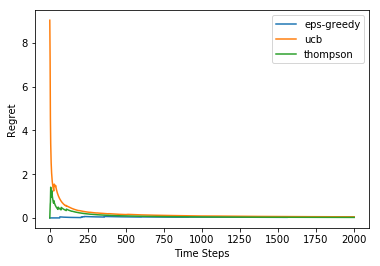

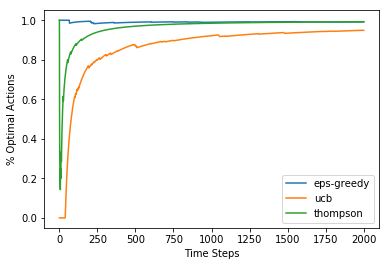

Choosen Rewards per Action
[ 0.09098249 -2.86125892 -0.6716531  -1.80987256  2.79113518  0.17806951
  2.23232405 -5.77391099  3.26616474 -4.44999953]


In [6]:
plt.clf()
k = 10
timesteps = 2000
trybandit = bandit(k=k, variance=4, seed=324)
optimal_reward_eps = trybandit.start(timesteps, name="eps-greedy", eps=0.01)
trybandit.plot("plots", noshow=True)
optimal_reward_ucb = trybandit.start(timesteps, name="ucb", c=2.)
trybandit.plot("plots", noshow=True)
optimal_reward_thp = trybandit.start(timesteps, name="thompson")
trybandit.plot("plots")
plt.clf()
plt.plot(range(1, timesteps+1), optimal_reward_eps, label="eps-greedy")
plt.plot(range(1,timesteps+1), optimal_reward_ucb, label="ucb")
plt.plot(range(1, timesteps+1), optimal_reward_thp, label="thompson")
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('% Optimal Actions')
plt.show()
print("Choosen Rewards per Action")
print(trybandit.true_rewards)

## 100 Arm Bandit and Variance in Rewards 1

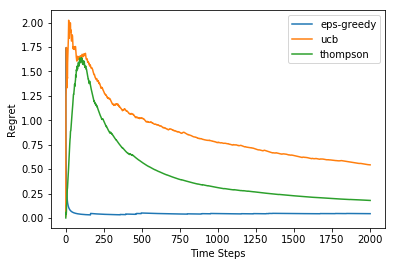

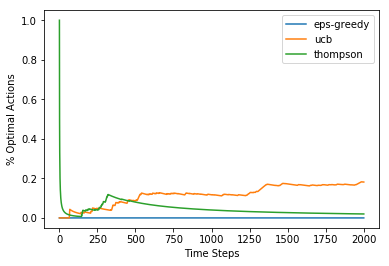

Choosen Rewards per Action
[-0.54779417 -0.98479007  0.14335887 -1.085261   -0.47173005  0.2808444
 -0.43019474  0.23845777  0.12718391 -0.35777734  0.47401271  0.62250913
 -0.69248558  0.05011886  0.95355059 -0.6109202   0.41150248 -0.44510064
  1.49701405  1.44632482  0.21015984 -0.77147777  0.12618259  1.71622776
 -1.13473783  0.21512258 -2.39271169 -0.12378266 -1.63438738 -1.47407646
  0.10940047 -0.39386775  1.2698755  -0.25864988 -1.01041647 -1.75409845
 -1.22644683 -0.74966306  0.78904572  0.47307302 -1.66808987 -0.04679098
 -0.68605802  0.01093614 -0.7190286  -0.83603846 -1.641316   -0.22414475
 -0.84267706  0.8254451   1.7606712  -0.8509808  -0.6943645   1.47474629
  0.94223904 -1.79497804  1.14138079  0.48862093  0.03206771  0.00377943
  0.48923196  0.88177608 -1.62142009  1.89593151  1.23112151  0.99920228
  0.21701928  0.27361037 -0.09095773  1.1451304  -0.50867381 -0.52347665
  0.20148062 -0.28960801 -0.36259265 -0.21699595  0.98030405  0.50010315
 -0.62984938  1.89153931 

In [7]:
plt.clf()
k = 100
timesteps = 2000
trybandit = bandit(k=k, variance=1, seed=457)
optimal_reward_eps = trybandit.start(timesteps, name="eps-greedy", eps=0.01)
trybandit.plot("plots", noshow=True)
optimal_reward_ucb = trybandit.start(timesteps, name="ucb", c=2.)
trybandit.plot("plots", noshow=True)
optimal_reward_thp = trybandit.start(timesteps, name="thompson")
trybandit.plot("plots")
plt.clf()
plt.plot(range(1, timesteps+1), optimal_reward_eps, label="eps-greedy")
plt.plot(range(1,timesteps+1), optimal_reward_ucb, label="ucb")
plt.plot(range(1, timesteps+1), optimal_reward_thp, label="thompson")
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('% Optimal Actions')
plt.show()
print("Choosen Rewards per Action")
print(trybandit.true_rewards)

## 100 Arm Bandit and Variance in Rewards 4

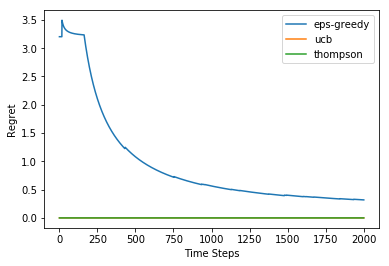

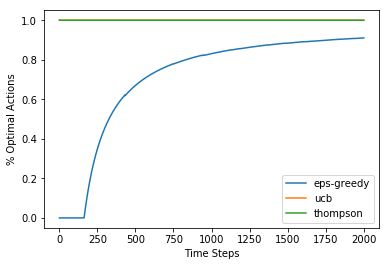

Choosen Rewards per Action
[ -4.80937449  -2.66252321   1.4868395   -0.01549915   8.27786268
   4.06949444  -1.05922974   0.58976477  -1.09307777   0.02816595
   5.0994456    0.82678269   3.22419002  -3.51772921   0.43940031
   9.55735926  -2.27877787  -3.29710612  -2.55196111   3.25494871
  -1.32880653  -3.39532199   4.88668692   2.6316104    0.68627715
   2.5997806   -2.08396772  -3.04245635  -0.51590176   0.86776077
   2.97384062   3.16397988   1.96435559  -2.92513668  -2.52535466
  -7.12221615  -3.53366202   3.30936358   4.48259684  -0.18204713
  -1.78514351   0.08729121   1.11858716   2.98175683   2.9514482
   4.13192553   0.1398737   -4.24246743  -2.02910589   0.9086642
   2.79568505  -2.00451222   4.92911663  -1.68271909  -0.28683512
  -4.50734072   3.04191928  -0.98878778  -4.42138628  -0.1088494
  -3.51134255   0.15933484  -0.49896624  -1.0404321   -4.56250933
   2.59291446  -1.33232942   6.35465038  -3.91926101  -3.94784117
   2.92524711   0.97075631   3.68641138   6.22179438

In [9]:
plt.clf()
k = 100
timesteps = 2000
trybandit = bandit(k=k, variance=4, seed=656)
optimal_reward_eps = trybandit.start(timesteps, name="eps-greedy", eps=0.01)
trybandit.plot("plots", noshow=True)
optimal_reward_ucb = trybandit.start(timesteps, name="ucb", c=2.)
trybandit.plot("plots", noshow=True)
optimal_reward_thp = trybandit.start(timesteps, name="thompson")
trybandit.plot("plots")
plt.clf()
plt.plot(range(1, timesteps+1), optimal_reward_eps, label="eps-greedy")
plt.plot(range(1,timesteps+1), optimal_reward_ucb, label="ucb")
plt.plot(range(1, timesteps+1), optimal_reward_thp, label="thompson")
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('% Optimal Actions')
plt.show()
print("Choosen Rewards per Action")
print(trybandit.true_rewards)

## Analysis of Results 
### 10 Arm Bandit and Variance in Rewards 1
### 10 Arm Bandit and Variance in Rewards 4
### 100 Arm Bandit and Variance in Rewards 1
### 100 Arm Bandit and Variance in Rewards 4

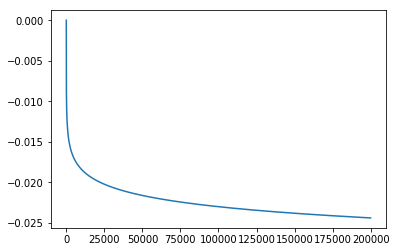

In [32]:
import numpy as np
import matplotlib.pyplot as plt
a = []
for t in range(1,200000):
    a.append(0.002*np.log(1/t))

plt.plot(a)
  